# Neural networks

Neural networks are a series of algorithms that mimic the human brain, in order to find complex boundaries to classify objects.

## Perceptron

The perceptron is the building block of a neural network, which receives some inputs ($x_1$, $x_2$, ..., $x_n$), associates them with **weights** ($w_1$, $w_2$, ..., $w_n$), process them ($w_1\times x_1 + w_2\times x_2 + ... + w_n\times x_n$) and returns an output.

This can also be written as $Wx + b$ where:

- $W$ is the weight matrix.
- $x$ is the inputs vector.
- $b$ is the bias.

Or $\sum{W_i x_i} + b$.

After that, we can apply a step function to check if the result should be logical true or false ($0$ or $1$).

We can, for instance, create a perceptron as a logical `AND` operator.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
weight1 = 0.7
weight2 = 0.7
bias = -1

# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns = ['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index = False))

Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                  -1.0                    0          Yes
       0          1                  -0.3                    0          Yes
       1          0                  -0.3                    0          Yes
       1          1                   0.4                    1          Yes


Or a `NOT` operator.

In [3]:
weight1 = 0
weight2 = -1
bias = 0.5

# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns = ['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index = False))

Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                   0.5                    1          Yes
       0          1                  -0.5                    0          Yes
       1          0                   0.5                    1          Yes
       1          1                  -0.5                    0          Yes


It's easy to see we ignored the first input and negated the second one.

In practice, finding the weights and bias is the computer's job. It will randomly choose some values and check for misclassified observations. For each one, it'll add or subtract it's coordinates, multiplied by a learning rate.

For example, let's suppose the equation $3x_1 + 4x_2 - 10 = 0$ was the first guess, and a missclassified point $(1, 1)$ should be classified as positive. We choose a learning rate, for instance 0.1 and let the perceptron do it's trick, adjusting the values:

The original weights and bias are: $3$, $4$ and $-10$.

After the first iteration it should be $(3 + 1\times0.1)$, $(4 + 1\times0.1)$ and $(-10 + 0.1)$, which results in $3.1$, $4.1$ and $-9.9$. After ten iterations, it should classify this correctly!

### Perceptron code

Recall that the perceptron step works as follows. For a point with coordinates $(p,q)(p,q)$, label $y$, and prediction given by the equation $\hat{y} = step(w_1x_1 + w_2x_2 + b)$:

- If the point is correctly classified, do nothing.
- If the point is classified positive, but has a negative label, subtract $\alpha p$, $\alpha q$, and $\alpha$ from $w_1$, $w_2$, and $b$ respectively.
- If the point is classified negative, but has a positive label, add $\alpha p$, $\alpha q$, and $\alpha$ from $w_1$, $w_2$, and $b$ respectively.

In [4]:
# Setting the random seed.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X, W) + b)[0])

# The function should receive as inputs the data X, the labels y, the
# weights W (as an array), and the bias b, update the weights and
# bias W, b, according to the perceptron algorithm, and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i], W, b)

        if y[i] > y_hat:
            W[0] += X[i][0] * learn_rate
            W[1] += X[i][1] * learn_rate
            b += learn_rate
        elif y[i] < y_hat:
            W[0] -= X[i][0] * learn_rate
            W[1] -= X[i][1] * learn_rate
            b -= learn_rate
    return W, b

# This function runs the perceptron algorithm repeatedly on the
# dataset, and returns a few of the boundary lines obtained in the
# iterations, for plotting purposes.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2, 1))
    b = np.random.rand(1)[0] + x_max

    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

In [5]:
# This function plot lines for each of the steps.
def plot_line(slope, intercept, alpha):
    axes = plt.gca()
    x = np.array(axes.get_xlim())
    y = intercept + slope * x
    plt.plot(x, y, alpha = alpha)

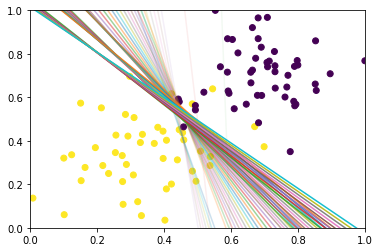

In [6]:
# Testing...
df = pd.read_csv('./csv/perceptron-data.csv', header = None)

plt.scatter(df[0], df[1], c = df[2])
matrix = df[[0, 1]].to_numpy()

lines = trainPerceptronAlgorithm(matrix, df[2].to_numpy(), learn_rate = 0.01, num_epochs = 50)

alpha = 0
increment = 1 / len(lines)

for line in lines:
    alpha = alpha + increment
    plot_line(line[0], line[1], alpha)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

## Gradient descent & Sigmoid function

When dealing with non-linear regions, we need to generalize the Perceptron to other types of curves different from lines.

Error functions assist us telling how far we are from the solution. With the use of **gradient descent**, small steps are taken and after each, we calculate the error, i.e. how the step took us closer to the result. In order to do this, the error function should be continuous, not discrete, so out step function won't work and will be replaced for a **Sigmoid function**:

$\sigma(x) = \frac{1}{1 + e^{-x}}$

## Softmax function

The next step to evolve the algorithm is to have multiple classes, so a yes/no answer won't suffice. What was done up until now was calculating the probability of an event, and it's complement as a consequence. If we desire to have multiple classes - type of animal, for example - we'll have to use a different function, called **Softmax function**:

$P(i) = \frac{e^{z_i}}{e^{z_1} + ... + e^{z_i}}$

In [7]:
# Function that takes as input a list of numbers, and returns
# the list of values given by the softmax function.
def softmax(L):
    exp = np.exp(L)
    sumExp = sum(exp)
    result = [i / sumExp for i in exp]
    return result

## One-hot encoding

Not always the data will be numeric. When there are multiple classes, it's values can be a string, like `Bird`, `Cat`, `Dog`. **One-hot encoding** is the process of transforming each of these values into its own column.

|Animal|
|:----:|
|Bird|
|Cat|
|Dog|

|Bird|Cat|Dog|
|:--:|:-:|:-:|
|1|0|0|
|0|1|0|
|0|0|1|

## Maximum likelihood & Cross entropy

The best algorithm is the one that gives the best probabilities to events that happened and this method is called **maximum likelihood**. The sum of negative logarithms of all probabilities is called **cross entropy**:

$$CE = - \sum_{i=1}^{m}y_i \times ln(p_i) + (1 - y_i) \times ln(1 - p_i)$$

Where $p_i$ is the probability of event $i$ and $y_i$ is the outcome of event $i$.

Our goal now is to minimize the cross entropy, thus getting the best algorithm.

In [8]:
def cross_entropy(Y, P):
    Y = np.float_(Y)
    P = np.float_(P)
    return -np.sum(Y * np.log(P) + (1 - Y) * np.log(1 - P))

For multiple classes, the cross entropy can be writen as the following:

$$CE = - \sum_{i = 1}^{n}\sum_{j = 1}^{m}y_{ij} \times ln(p_{ij})$$

## Error function

The error function is the cross entropy divided by the number of events:

$$E = - \frac{1}{m} \sum_{i=1}^{m}y_i \times ln(\hat{y_i}) + (1 - y_i) \times ln(1 - \hat{y_i})$$

Which can be rewriten as follows:

$$E(W,b) = - \frac{1}{m} \sum_{i=1}^{m}y_i \times ln(\sigma(Wx_i + b)) + (1 - y_i) \times ln(1 - \sigma(Wx_i + b))$$

The gradient of E is the following:

$$∇E = (\frac{\partial E}{\partial w_1}, \frac{\partial E}{\partial w_2}, ..., \frac{\partial E}{\partial w_n}, \frac{\partial E}{\partial b})$$

Doing the proper calculations of the partial derivatives, it comes to this:

$$∇E = - (y - \hat{i})(x_1, x_2, ... , x_n, 1)$$

Which means, the gradient is actually a scalar (multiple of the difference between the label and the prediction) times the coordinates of the point.


$w'_i ← w_i + \alpha(y - \hat{y})x_i$

$b' ← b + \alpha(y - \hat{y})$

## Neural network

A neural network is "simply" a linear combination of perceptrons.

![Neural network diagram](./img/neural-network-01.png)
![Neural network diagram](./img/neural-network-02.png)

In the example above, the first first perceptron receives two inputs, $x_1$ and $x_2$, with weights $5$ and $-2$, respectively, and a bias of $-8$. Similarly, the second receives its inputs with weights $7$ and $3$ and bias $1$. Then we combine these two perceptrons with a weight of $7$ for the first and $5$ for the second, subtracting $6$ of bias. The inputs are called _input layer_, the middle layer is called _hidden layer_ and the final outcome, _output layer_.

It's possible to have multiple hidden layers, and that's called a deep neural network.

At the same time, we can have multiple outcomes, when dealing with multi-class, for instance. That is possible by having multiple outputs in the final layer.

## Feedforward

Feedforward is the process neural networks use to turn an output from one layer into an input for the next layer.

![Feedforward process](./img/feedforward.png)

## Backpropagation

Backpropagation is the opposite of feedforward. When we have the output of the neural network, we calculate its error and spread it backwards, updating the weights to get a better model.

![Backpropagation process](./img/backpropagation-01.png)
![Backpropagation process](./img/backpropagation-02.png)

## Underfitting and overfitting

In machine learning, it's common to create solutions too simple to solve the problem and the algorithm misclassifies a resonable amount of data. Similarly, we often see solutions excessively complicated to achieve the goal, making it too specific. These are called _underfitting_ and _overfitting_, respectively.

![Underfitting and overfitting](./img/fitting-errors.png)

### Early stopping

When training our model, it begins with lots of errors and as we advance in epochs, the number of errors decreases. But that's true for the training error. When we split the dataset for training and testing, the testing errors decrease in the beginning, but starts to increase after a while. Early stopping is the technique used to stop training when testing errors is minimum.

## Regularization

Large coefficients result in less errors, but also end up with an overfitting model, which can be hard to generalize.

The fix to this problem is to tweak the error function, penalizing large weights. The first way to do this, is adding $\lambda (|w_1| + ... + |w_n|)$, which is called _L1 regularization_. The second we add $\lambda (w_1^2 + ... + w_n^2)$ and this is called _L2 regularization_.

The first is useful for feature selection, and the second is better for training models.

## Dropout

There can be times when the weights of a particular node dominates the training and some others don't even have a significant role in the model. To avoid this situation, during each epoch we randomly turn off some nodes and that's called _dropout_. This is done assigning a probability for each node to be dropped at each epoch.

## Local minima & random restart

Gradient descent helped us take a step in the direction to find the minimum of a function. But we can end up being stuck in a local minima. To increase the odds of finding the global minima we use what's called _random restart_, which is simply restarting at different points of the function.

## Activation functions

Since the Sigmoid function only return values between $0$ and $1$, it's derivative is very small, and the steps taken in gradient descent becomes too small. To surpass this problem, there are other common activation functions, such as the _hyperbolic tangent_ and the _rectified linear unit (relu)_:

$$tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

$$relu(x) = \begin{cases}
    x & \text{if} & x \ge 0\\
    0 & \text{if} & x < 0
    \end{cases}$$

## Stochastic gradient descent

Gradient descent tells us to use all our datapoints, run through the neural network, calculate the error and backpropagate to get better weights. Real datasets have millions of observations which can require a lot of memory to do the computation. _Stochastic gradient descent_ splits the dataset into batches and do this process with each batch.

## Learning rate

The use of the learning rate can have a huge impact in the result of the model. If it's too big, we approach the minimum faster, but may end up never reaching it. If it's too small, we may need a very long time to train the model, but can find the optimal solution.

## Momentum

When we face a local minima, we can use the previous steps to help us surpass a hump and try to find the global minima. This is done using a constant momentum ($\beta$):

$$step(n) = step(n - 1) + \beta \times step(n - 2) + \beta^2 \times step(n - 3) + ...$$